In [37]:
# Importing Library
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [38]:
df_india = df[df['job_country'] == 'India'].copy()

In [39]:
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')

df_india.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",June
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",April
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,March
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'...",July
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari...",November


In [40]:
df_india_pivot = df_india.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [41]:
df_india_pivot.reset_index(inplace=True)

In [42]:
df_india_pivot['month_no'] = pd.to_datetime(df_india_pivot['job_posted_month'], format='%B').dt.month

df_india_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [43]:
df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,170,32,418,1566,946,54,86,375,194,169,4
1,August,189,25,618,1407,1157,47,126,343,235,148,8
2,December,186,27,648,1464,1206,94,77,343,200,133,12
3,February,143,35,433,1631,932,42,94,313,165,157,2
4,January,175,31,628,2132,1444,70,127,448,269,192,1
5,July,142,25,457,1528,1123,54,75,359,204,155,7
6,June,146,26,367,1632,1129,41,66,427,238,125,6
7,March,116,37,422,1591,1005,34,96,351,194,180,3
8,May,103,14,278,1384,837,31,59,329,134,98,5
9,November,192,29,722,1743,1614,52,125,423,278,139,11


In [44]:
df_india_pivot.sort_values('month_no', inplace=True)

df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,175,31,628,2132,1444,70,127,448,269,192,1
3,February,143,35,433,1631,932,42,94,313,165,157,2
7,March,116,37,422,1591,1005,34,96,351,194,180,3
0,April,170,32,418,1566,946,54,86,375,194,169,4
8,May,103,14,278,1384,837,31,59,329,134,98,5
6,June,146,26,367,1632,1129,41,66,427,238,125,6
5,July,142,25,457,1528,1123,54,75,359,204,155,7
1,August,189,25,618,1407,1157,47,126,343,235,148,8
11,September,155,34,630,1508,984,67,85,324,195,132,9
10,October,170,36,500,1476,902,85,67,318,180,167,10


In [45]:
df_india_pivot.set_index('job_posted_month')

df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,175,31,628,2132,1444,70,127,448,269,192,1
3,February,143,35,433,1631,932,42,94,313,165,157,2
7,March,116,37,422,1591,1005,34,96,351,194,180,3
0,April,170,32,418,1566,946,54,86,375,194,169,4
8,May,103,14,278,1384,837,31,59,329,134,98,5
6,June,146,26,367,1632,1129,41,66,427,238,125,6
5,July,142,25,457,1528,1123,54,75,359,204,155,7
1,August,189,25,618,1407,1157,47,126,343,235,148,8
11,September,155,34,630,1508,984,67,85,324,195,132,9
10,October,170,36,500,1476,902,85,67,318,180,167,10


In [46]:
df_india_pivot.drop(columns='month_no', inplace=True)

df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
4,January,175,31,628,2132,1444,70,127,448,269,192
3,February,143,35,433,1631,932,42,94,313,165,157
7,March,116,37,422,1591,1005,34,96,351,194,180
0,April,170,32,418,1566,946,54,86,375,194,169
8,May,103,14,278,1384,837,31,59,329,134,98
6,June,146,26,367,1632,1129,41,66,427,238,125
5,July,142,25,457,1528,1123,54,75,359,204,155
1,August,189,25,618,1407,1157,47,126,343,235,148
11,September,155,34,630,1508,984,67,85,324,195,132
10,October,170,36,500,1476,902,85,67,318,180,167


In [47]:
df_india_pivot.set_index('job_posted_month', inplace=True)

In [48]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


<Axes: xlabel='job_posted_month'>

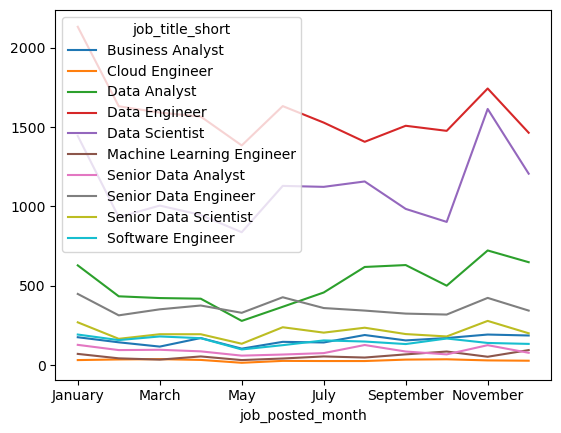

In [49]:
df_india_pivot.plot(kind='line')

In [50]:
top_3 = df_india['job_title_short'].value_counts().head(3)

top_3 = list(top_3.index)

top_3

['Data Engineer', 'Data Scientist', 'Data Analyst']

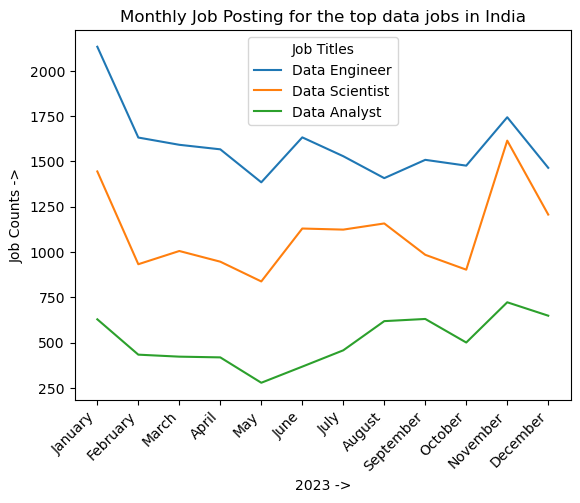

In [59]:
df_india_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Posting for the top data jobs in India')
plt.xlabel('2023 ->')
plt.ylabel('Job Counts ->')
plt.legend(title='Job Titles')
plt.xticks(range(len(df_india_pivot.index)), df_india_pivot.index, rotation=45, ha='right')
plt.show()